In [1]:
# Let's import the required libraries beforehand

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Understanding the Dataset and EDA

In [2]:
# load and read the data from the csv file provided
df = pd.read_csv('Case Study Data.csv')

display(df.shape)
display(df.head())

(41188, 21)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  36040 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

From the above sections, we can understand that the dataset is an equal mix of categorical and numerical data. The binary target variable has 88% negative data and just 12% positive which says that the dataset is a highly skewed one.

We have some missing values in two columns 'age' and 'cons.price.idx'

In [6]:
# we have null values in columns 'age', 'cons.price.idx'
# the percentage of null values in each of these columns is as follows

df_len = len(df.index)
print(df[['age','cons.price.idx']].isna().sum()/df_len)

age               0.090900
cons.price.idx    0.124988
dtype: float64


Since the nulls values are very small in number compared to the total dataframe, we can either remove these rows or replace them with mean/median of respective columns.
Let's see how these columns are distributed first

In [7]:
df[['age','cons.price.idx']].describe()

,age,cons.price.idx
count,37444.000000,36040.000000
mean,39.999947,93.575575
std,10.414908,0.579216
min,17.000000,92.201000
25%,32.000000,93.075000
50%,38.000000,93.749000
75%,47.000000,93.994000
max,98.000000,94.767000


<AxesSubplot:>

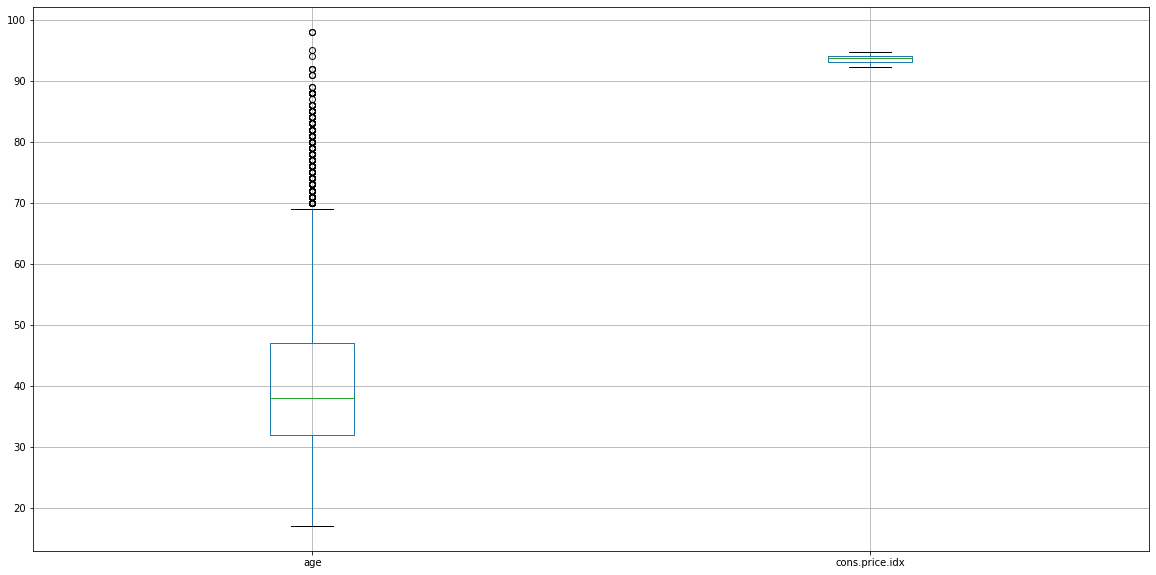

In [8]:
plt.figure(figsize = (20,10))
df[['age','cons.price.idx']].boxplot()

In [9]:
missing_age_count = len(df[df['age'].isna()])
missing_age_values = (df[df['age'].isna() == True]['y'] == 'yes').sum()/missing_age_count
print('missing_age_values % = ',missing_age_values)

missing_price_count = len(df[df['cons.price.idx'].isna()])
missing_price_values = (df[df['cons.price.idx'].isna() == True]['y'] == 'yes').sum()/missing_price_count
print('missing_price_values % = ',missing_price_values)

missing_age_values % =  0.11805555555555555
missing_price_values % =  0.1114996114996115


The positive spread('yes') of our target variable 'y' in original dataframe(11.26%) is almost same
as missing values. 

Since the mean and median of both the features are close, we can replace the nan values with either of them instead of removing those nan rows.

Additionally, we will also remove 'duration' column as it is direclty related to the target variable

In [10]:
df['age'] = df['age'].fillna(df['age'].median())
df['cons.price.idx'] = df['cons.price.idx'].fillna(df['cons.price.idx'].median())

Now, let's convert the target variable into numeric type

In [11]:
#df2 = df.dropna()
df = df.drop('duration', axis=1)
df['y'] = df['y'].replace({'yes':1, 'no':0})
df.shape

(41188, 20)

In [12]:
categorical_columns = list(df.select_dtypes('object').columns)
print(categorical_columns)

numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
numerical_columns.remove('y')
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Bivariate Analysis of Numerical Columns

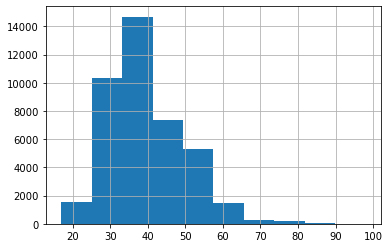

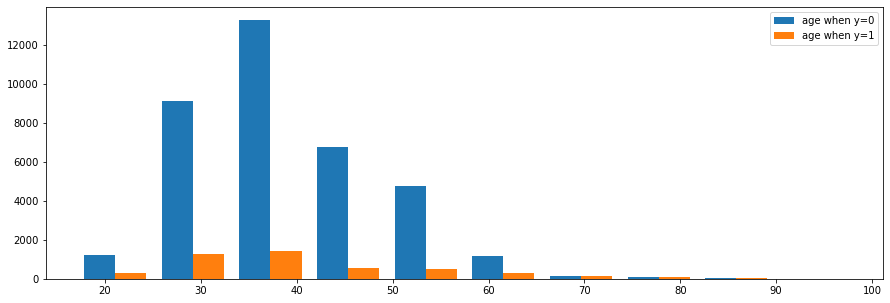

In [13]:
df['age'].hist()
plt.figure(figsize=(15,5))
plt.hist([df[df['y'] == 0]['age'],df[df['y'] == 1]['age']], label=['age when y=0','age when y=1'])
plt.legend(loc='upper right')
plt.show()

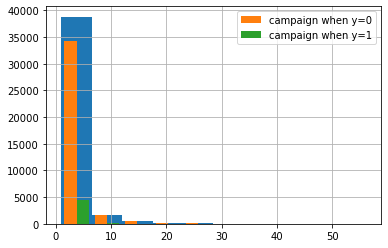

In [14]:
df['campaign'].hist()
plt.hist([df[df['y'] == 0]['campaign'],df[df['y'] == 1]['campaign']], label=['campaign when y=0','campaign when y=1'])
plt.legend(loc='upper right')
plt.show()

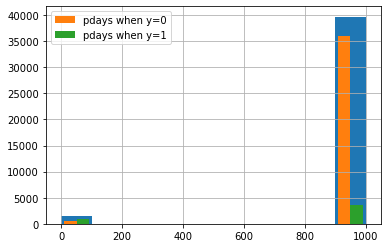

In [15]:
df['pdays'].hist()
plt.hist([df[df['y'] == 0]['pdays'],df[df['y'] == 1]['pdays']], label=['pdays when y=0','pdays when y=1'])
plt.legend(loc='upper left')
plt.show()

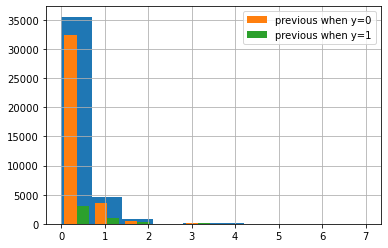

In [16]:
df['previous'].hist()
plt.hist([df[df['y'] == 0]['previous'],df[df['y'] == 1]['previous']], label=['previous when y=0','previous when y=1'])
plt.legend(loc='upper right')
plt.show()

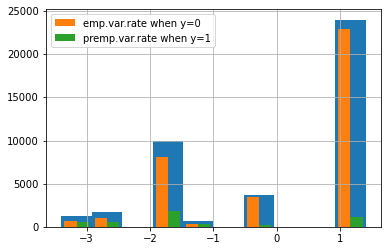

In [17]:
df['emp.var.rate'].hist()
plt.hist([df[df['y'] == 0]['emp.var.rate'],df[df['y'] == 1]['emp.var.rate']], label=['emp.var.rate when y=0','premp.var.rate when y=1'])
plt.legend(loc='upper left')
plt.show()

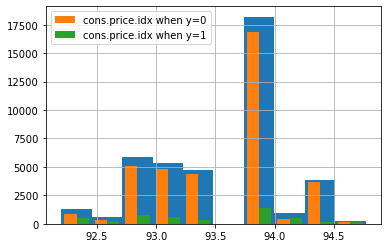

In [18]:
df['cons.price.idx'].hist()
plt.hist([df[df['y'] == 0]['cons.price.idx'],df[df['y'] == 1]['cons.price.idx']], label=['cons.price.idx when y=0','cons.price.idx when y=1'])
plt.legend(loc='upper left')
plt.show()

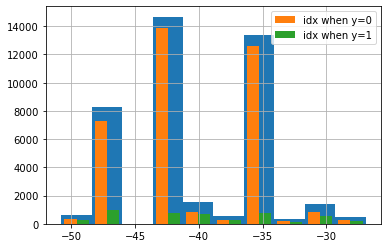

In [19]:
df['cons.conf.idx'].hist()
plt.hist([df[df['y'] == 0]['cons.conf.idx'],df[df['y'] == 1]['cons.conf.idx']], label=['idx when y=0','idx when y=1'])
plt.legend(loc='upper right')
plt.show()

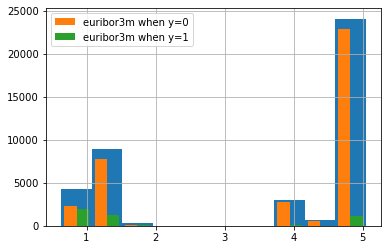

In [20]:
df['euribor3m'].hist()
plt.hist([df[df['y'] == 0]['euribor3m'],df[df['y'] == 1]['euribor3m']], label=['euribor3m when y=0','euribor3m when y=1'])
plt.legend(loc='upper left')
plt.show()

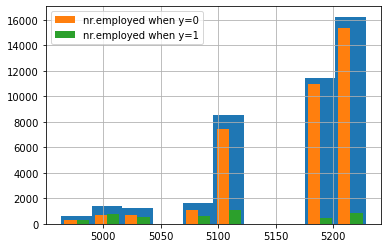

In [21]:
df['nr.employed'].hist()
plt.hist([df[df['y'] == 0]['nr.employed'],df[df['y'] == 1]['nr.employed']], label=['nr.employed when y=0','nr.employed when y=1'])
plt.legend(loc='upper left')
plt.show()

### Bivariate Analysis of Categorical Columns

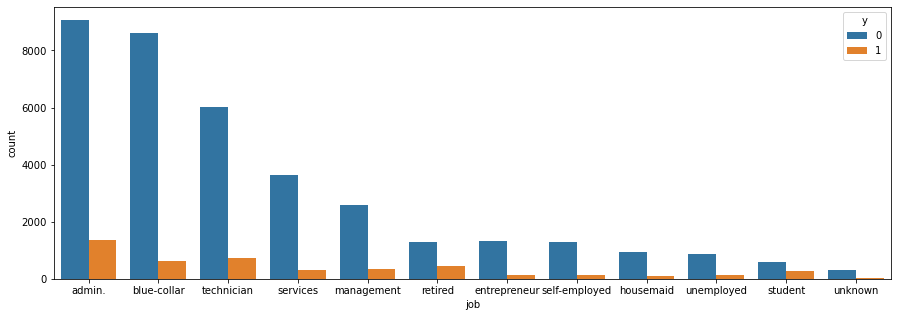

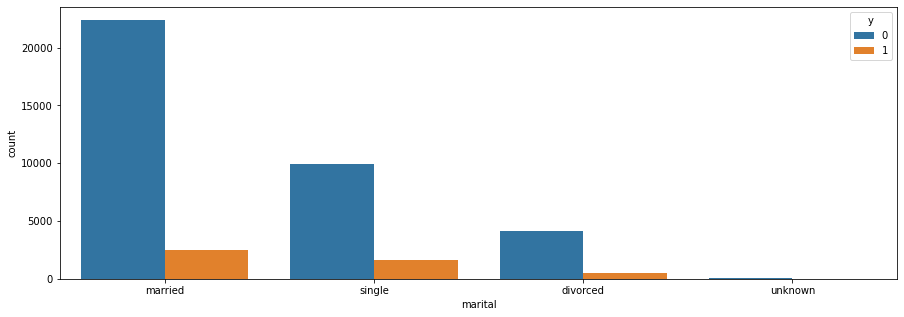

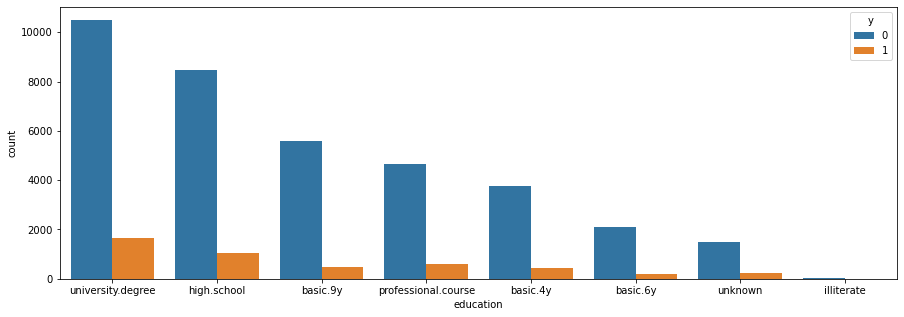

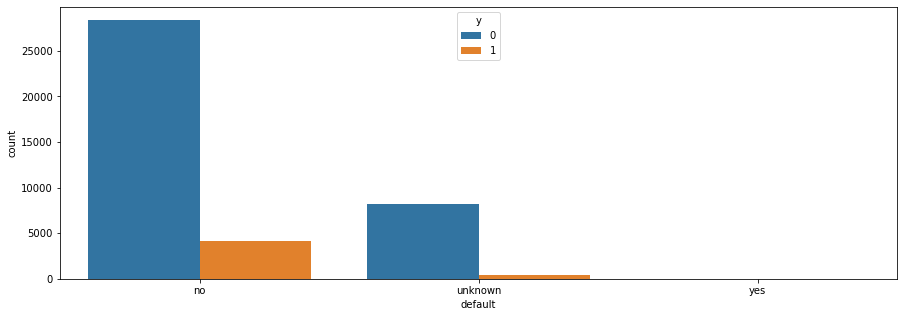

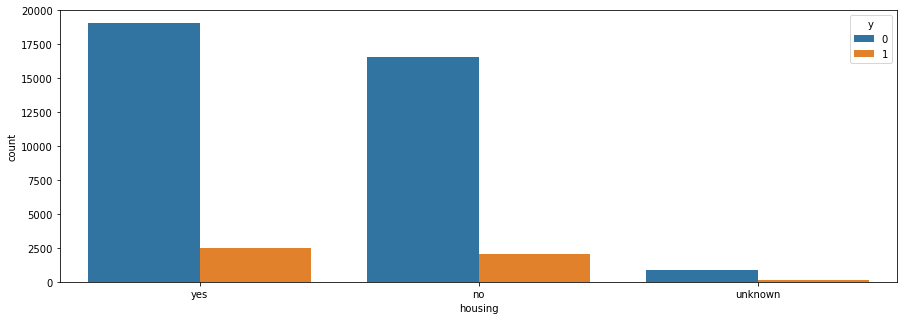

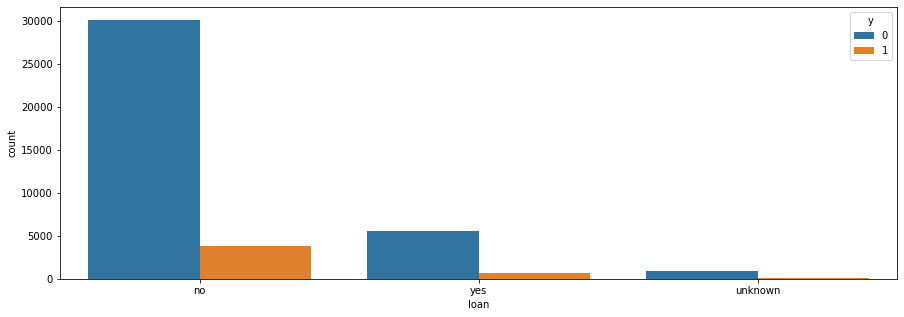

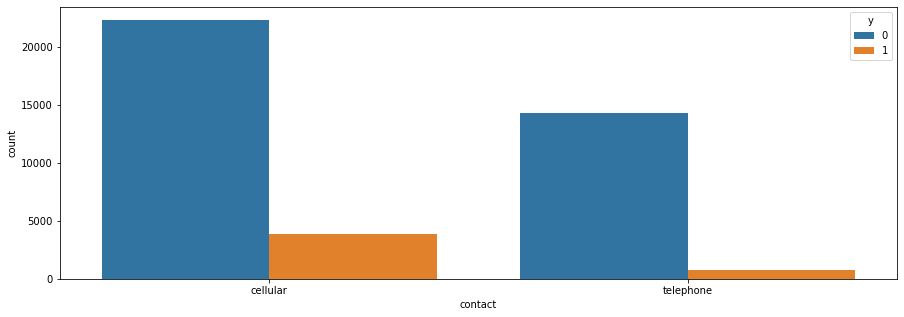

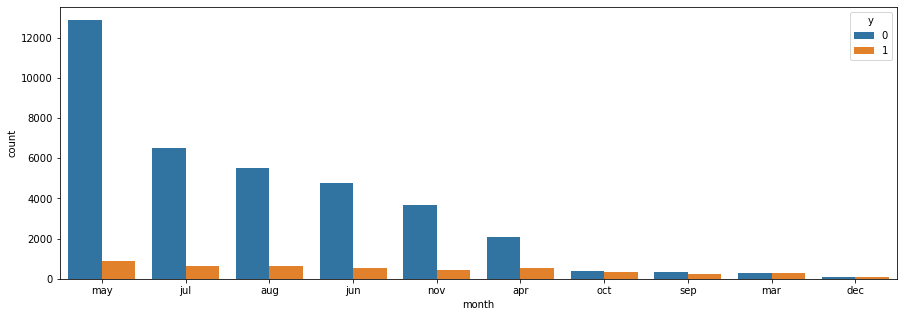

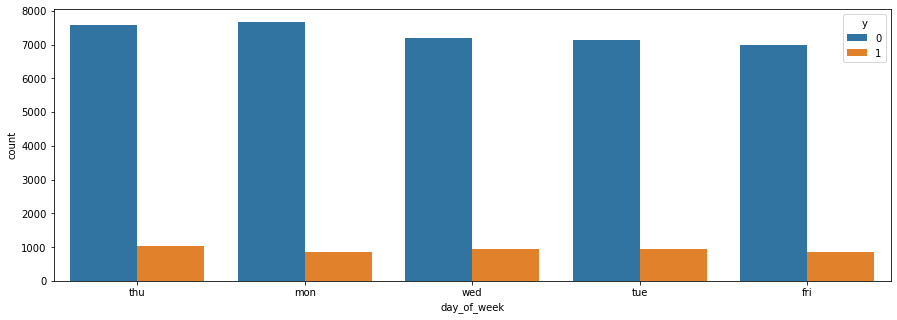

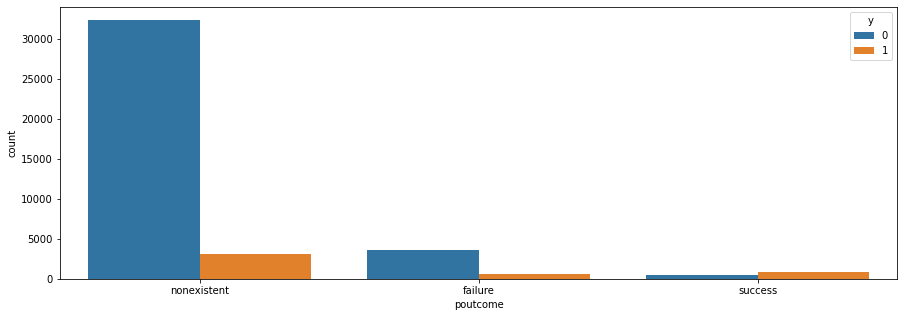

In [22]:
for i in categorical_columns:
    plt.figure(figsize=(15,5))
    sns.countplot(x =i, hue='y',data = df,order = df[i].value_counts().index) #individual bars sorted acc to frequency and then plotted

### Observations from the EDA

From the numerical features, we can observe the following points:
1. Even though the dataset is dominated by age groups 30-50 years, the proportion of subscription is higher in people with age > 50. Since the age has bigger range, we can bin the age into 3-4 groups and replace the current entries with mean/median of the corresponding group.
2. The proportion of subscription is higher when the 'euribor3m' rate is lower(<3)
3. The columns 'campaign' and 'pdays' are highly skewed and hence no inference can be made. 'pdays' feature can be converted into binary since the 999 is dominant(user not contacted) with over 95% entries. So we will replace the entries as 0(if 999) and 1(if not 999)
4. The number of subscriptions remains almost same across different values of cons.conf.idx and cons.price.idx


From the Categorical features, we can observe the following points:

1. Even though the dataset is dominated by married people, the proportion of subscription is marginally higher in singles than married people.
2. When it comes to loans, proportion of subscriptions is same for people with/without a housing loan. However, it is not the same with personal loan. People having personal loan tend to have more interest towards subscriptions.
3. Days of week is distributed similarly for all values for both y=0 and y=1. So it is not useful to keep this parameter for modelling. 
4. Retired people and students have more proportions of subscriptions compared to other jobs. However their data is not as much as other professions.

In [23]:
# removing days of week and contact since they don't contribute to the 

df2 = df.copy()
df2 = df2.drop(['day_of_week'],axis=1)
#categorical_columns.remove('contact')
#categorical_columns.remove('day_of_week')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.749,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,1,999,0,nonexistent,1.1,93.749,-36.4,4.857,5191.0,0


<AxesSubplot:>

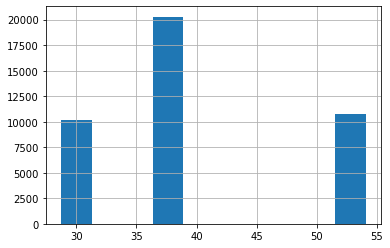

In [24]:
# converting age range variable into buckets of 0-33, 33-46, >46(based on the quartile distribution) 
first_quartile_mean = df2[(df2['age'] < 33)]['age'].mean()
second_3rd_quartile_mean = df2[(df2['age'] > 33) & (df2['age'] < 46)]['age'].mean()
fourth_quartile_mean = df2[(df2['age'] > 46)]['age'].mean()

def convertAgeIntoInt(data):
    if data < 33:
        return first_quartile_mean
    elif data >=33 and data < 46:
        return second_3rd_quartile_mean
    elif data >=46:
        return fourth_quartile_mean

df2['age'] = df2['age'].apply(convertAgeIntoInt)
df2['age'].hist()


<AxesSubplot:>

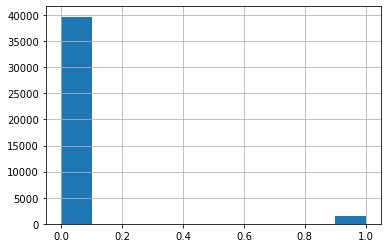

In [25]:
# converting 'pdays' range variable into binary
def convertPdaysIntoInt(data):
    if data == 999:
        return 0
    else:
        return 1

df2['pdays'] = df2['pdays'].apply(convertPdaysIntoInt)
df2['pdays'].hist()

Since we have multiple categorical variables, we will need to convert it into numerical data for modelling purposes. We will use
one hot coding technique to convert these features.

### One Hot Coding for Categorical variables

In [26]:
# we use pandas get_dummies() function to covnert categorical variables into numerical features

df2 = pd.get_dummies(df2)
df2.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,54.079514,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,54.079514,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,38.677152,1,0,0,1.1,93.749,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,38.677152,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,54.079514,1,0,0,1.1,93.749,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


Post one hot coding, we have a total of 58 columns. This is an acceptable number given the large dataset we currently have.

### Splitting the dataset into Train, Validation and Test data

In [27]:
features = list(df2.columns)
features.remove('y')

X = df2[features]
y = df2['y']

We split the data into training, validation and test data(60,20,20) ratio and train the models.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25, random_state = 0)

In [29]:
# To make sure if the any of the dataset is not biased, we check the distribution of target variable in each of them.

print('Training data target variable distribution:\n',y_train.value_counts(normalize=True))
print('Validation data target variable distribution:\n',y_val.value_counts(normalize=True))
print('Test data target variable distribution:\n',y_test.value_counts(normalize=True))

Training data target variable distribution:
 0    0.887302
1    0.112698
Name: y, dtype: float64
Validation data target variable distribution:
 0    0.88638
1    0.11362
Name: y, dtype: float64
Test data target variable distribution:
 0    0.888444
1    0.111556
Name: y, dtype: float64


## Building the prediction models

Let's start building the models with training data and validate them using validation data. Once we finalize on the model, we can evaluate it's performance using test data.

Let's start with simple Logistic regression and continue further

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

y_logreg_val_pred = logreg.predict(X_val)

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_logreg_val_pred)
cnf_matrix

array([[7199,  103],
       [ 732,  204]], dtype=int64)

In [32]:
logreg_accuracy = metrics.accuracy_score(y_val, y_logreg_val_pred)
logreg_precision = metrics.precision_score(y_val, y_logreg_val_pred)
logreg_recall = metrics.recall_score(y_val, y_logreg_val_pred)
logreg_f1_score = metrics.f1_score(y_val, y_logreg_val_pred)

print("Accuracy:",logreg_accuracy)
print("Precision:",logreg_precision)
print("Recall:",logreg_recall)
print("F1 Score:",logreg_f1_score)
comparison_list = []

Accuracy: 0.8986404467103666
Precision: 0.6644951140065146
Recall: 0.21794871794871795
F1 Score: 0.32823813354786807


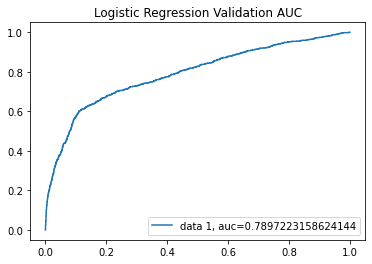

In [33]:
y_pred_proba = logreg.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Logistic Regression Validation AUC')
plt.show()

comparison_list.append(['Logistic Regression',logreg_accuracy, logreg_precision, logreg_recall, logreg_f1_score, auc])

In [34]:
coeff = logreg.coef_[0]
new_insight = list(zip(features,coeff))
new_insight = sorted(new_insight, key=lambda x: x[1])
new_insight[:10]+new_insight[-10:]

[('month_may', -0.6349427862952265),
 ('poutcome_failure', -0.4678260727140938),
 ('contact_telephone', -0.30912109425455336),
 ('job_blue-collar', -0.1844546006234727),
 ('emp.var.rate', -0.1561090415568312),
 ('default_unknown', -0.12572455111605127),
 ('euribor3m', -0.11502438775515861),
 ('job_services', -0.09768978571590221),
 ('education_basic.9y', -0.07157616018267819),
 ('month_nov', -0.06604740542197696),
 ('job_retired', 0.1071396400903045),
 ('education_university.degree', 0.10972300552240907),
 ('default_no', 0.12879602612963456),
 ('month_jun', 0.1384249056931666),
 ('month_mar', 0.19456174563407055),
 ('month_jul', 0.24454268726815764),
 ('contact_cellular', 0.3121925692734647),
 ('cons.price.idx', 0.3502557173424158),
 ('poutcome_success', 0.459361792036824),
 ('pdays', 0.48896956349710347)]

### Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
clf = decision_tree.fit(X_train,y_train)

y_dt_val_pred = decision_tree.predict(X_val)

In [36]:
cnf_matrix = metrics.confusion_matrix(y_val, y_dt_val_pred)
cnf_matrix

array([[7101,  201],
       [ 649,  287]], dtype=int64)

In [37]:
dt_accuracy = metrics.accuracy_score(y_val, y_dt_val_pred)
dt_precision = metrics.precision_score(y_val, y_dt_val_pred)
dt_recall = metrics.recall_score(y_val, y_dt_val_pred)
dt_f1_score = metrics.f1_score(y_val, y_dt_val_pred)

print("Accuracy:",dt_accuracy)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F1 Score:",dt_f1_score)


Accuracy: 0.8968196164117505
Precision: 0.5881147540983607
Recall: 0.30662393162393164
F1 Score: 0.40308988764044945


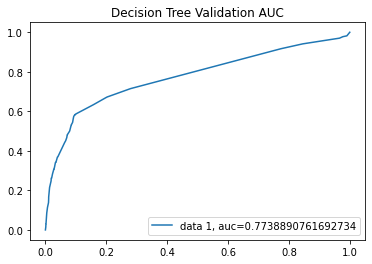

In [38]:
y_pred_proba = decision_tree.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Decision Tree Validation AUC')
plt.show()
comparison_list.append(['Decision Trees',dt_accuracy, dt_precision, dt_recall, dt_f1_score, auc])

In [39]:
dt_feature_imp = pd.Series(decision_tree.feature_importances_,index=features).sort_values(ascending=False)
dt_feature_imp[:10]

nr.employed             0.611375
euribor3m               0.089986
cons.conf.idx           0.088597
pdays                   0.075626
month_oct               0.026076
campaign                0.016796
poutcome_nonexistent    0.011533
contact_telephone       0.007743
job_retired             0.007515
age                     0.005634
dtype: float64

### Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='entropy',n_estimators=250)

random_forest.fit(X_train,y_train)

y_rf_val_pred=random_forest.predict(X_val)

In [41]:
cnf_matrix = metrics.confusion_matrix(y_val, y_rf_val_pred)
cnf_matrix

array([[7049,  253],
       [ 661,  275]], dtype=int64)

In [42]:
rf_accuracy = metrics.accuracy_score(y_val, y_rf_val_pred)
rf_precision = metrics.precision_score(y_val, y_rf_val_pred)
rf_recall = metrics.recall_score(y_val, y_rf_val_pred)
rf_f1_score = metrics.f1_score(y_val, y_rf_val_pred)

print("Accuracy:",rf_accuracy)
print("Precision:",rf_precision)
print("Recall:",rf_recall)
print("F1 Score:",rf_f1_score)


Accuracy: 0.8890507404709881
Precision: 0.5208333333333334
Recall: 0.2938034188034188
F1 Score: 0.3756830601092897


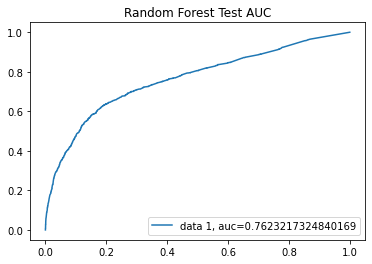

In [43]:
y_pred_proba = random_forest.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Random Forest Test AUC')
plt.show()

comparison_list.append(['Random Forests',rf_accuracy, rf_precision, rf_recall, rf_f1_score, auc])

In [44]:
rf_feature_imp = pd.Series(random_forest.feature_importances_,index=features).sort_values(ascending=False)
rf_feature_imp[:10]


euribor3m         0.190800
campaign          0.108880
age               0.057245
nr.employed       0.051197
cons.price.idx    0.039512
emp.var.rate      0.030528
cons.conf.idx     0.029573
pdays             0.023600
housing_no        0.022014
housing_yes       0.021869
dtype: float64

### XG Boosting Classifier

In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200)

xgb.fit(X_train,y_train)

y_xgb_val_pred=random_forest.predict(X_val)

D:\Setupfiles\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
xgb_accuracy = metrics.accuracy_score(y_val, y_xgb_val_pred)
xgb_precision = metrics.precision_score(y_val, y_xgb_val_pred)
xgb_recall = metrics.recall_score(y_val, y_xgb_val_pred)
xgb_f1_score = metrics.f1_score(y_val, y_xgb_val_pred)

print("Accuracy:",xgb_accuracy)
print("Precision:",xgb_precision)
print("Recall:",xgb_recall)
print("F1 Score:",xgb_f1_score)


Accuracy: 0.8890507404709881
Precision: 0.5208333333333334
Recall: 0.2938034188034188
F1 Score: 0.3756830601092897


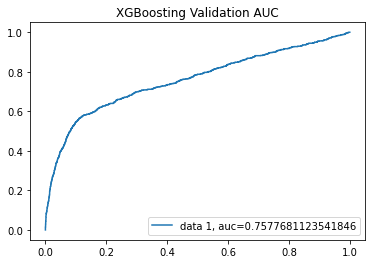

In [47]:
y_pred_proba = xgb.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('XGBoosting Validation AUC')
plt.show()

comparison_list.append(['XGBoosting',xgb_accuracy, xgb_precision, xgb_recall, xgb_f1_score, auc])

### Model comparison

In [48]:
new_df = pd.DataFrame(comparison_list, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
round(new_df,3)
new_df.style.set_caption("Validation Results")


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.898640,0.664495,0.217949,0.328238,0.789722
1,Decision Trees,0.896820,0.588115,0.306624,0.403090,0.773889
2,Random Forests,0.889051,0.520833,0.293803,0.375683,0.762322
3,XGBoosting,0.889051,0.520833,0.293803,0.375683,0.757768


As seen from the above dataframe, all the models have similar performance. We cannot take accuracy as our primary performance
metric since our dataset is skewed from the beginning.

So we will consider both F1 score and AUC as our primary performance metrics. Based on these parameters, Decision Trees has
marginally outperformed the other models.

## Evaluating on Test data

In [49]:
y_logreg_test_pred = logreg.predict(X_test)
y_dt_test_pred = decision_tree.predict(X_test)


In [50]:
print("Logistic Regression \n")
print("Accuracy:",metrics.accuracy_score(y_test, y_logreg_test_pred))
print("Precision:",metrics.precision_score(y_test, y_logreg_test_pred))
print("Recall:",metrics.recall_score(y_test, y_logreg_test_pred))
print("F1 Score:",metrics.f1_score(y_test, y_logreg_test_pred))

print("\n Decision Trees \n")
print("Accuracy:",metrics.accuracy_score(y_test, y_dt_test_pred))
print("Precision:",metrics.precision_score(y_test, y_dt_test_pred))
print("Recall:",metrics.recall_score(y_test, y_dt_test_pred))
print("F1 Score:",metrics.f1_score(y_test, y_dt_test_pred))


Logistic Regression 

Accuracy: 0.9002184996358339
Precision: 0.6549520766773163
Recall: 0.22306855277475518
F1 Score: 0.33279220779220786

 Decision Trees 

Accuracy: 0.9016751638747269
Precision: 0.6162046908315565
Recall: 0.3144722524483134
F1 Score: 0.41642651296829974


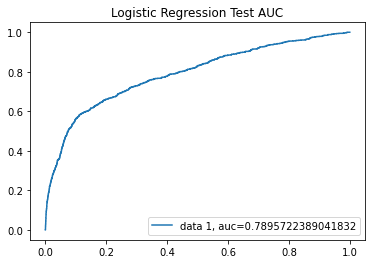

In [51]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Logistic Regression Test AUC')
plt.legend(loc=4)
plt.show()


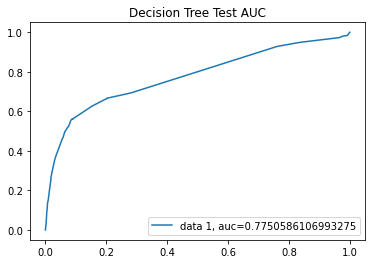

In [52]:
y_pred_proba = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Decision Tree Test AUC')
plt.show()


From the final models, we found that all tree based models are performing similarly with a marginal advantage to Decision Trees. From the feature importance of both decision tree and random forest, we can pick that features such as "euribor3m", "nr_employed","age" and "cons.price.idx" are vital in making a decision about the subscriptions. So for the next campaigns, we can try and ensure these parameters are in the correct levels(low euribor3m and high cons.price.idx)

Based on the EDA, we understood there are certain group of people whose subscription rate is larger than others. These include people with age above 50, retired people and people having personal loans are more interested in subscriptions. Hence, we can focus on such groups to increase the number of subscriptions.


If we were to ask for more details, we can request for personalized economic indicators such as recent credit score. Since credit scores reflect the financial stability of a customer, that can be really helpful in predicting the term product subscription. 